In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    'font.size': 14})


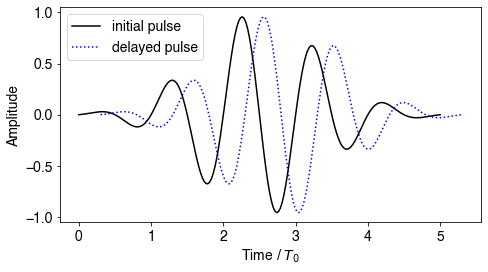

In [44]:
def wave(t,T):
    gaus_range = np.linspace(-3,3, len(t))
    return np.sin(2*np.pi *t/T) * np.exp(-gaus_range**2/2)

t = np.linspace(0, 5, 200)

plt.figure(figsize=(7,4))
plt.plot(t, wave(t,1), c='black', label='initial pulse')
plt.plot(t+0.3, wave(t,1),  ':', c='blue', label='delayed pulse')
plt.xlabel('Time / $T_0$')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.savefig('pulse.pdf')

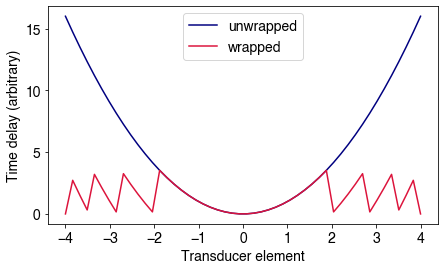

In [47]:
def quad(x):
    return x*x 
x = np.linspace(-4,4)

plt.figure(figsize = (7,4))
plt.plot(x, quad(x), c='navy', label='unwrapped')
plt.plot(x, np.mod(quad(x), 4), c='crimson', label='wrapped')
plt.ylabel('Time delay (arbitrary)')
plt.xlabel('Transducer element')
plt.legend()
plt.savefig('phasewrap.pdf')

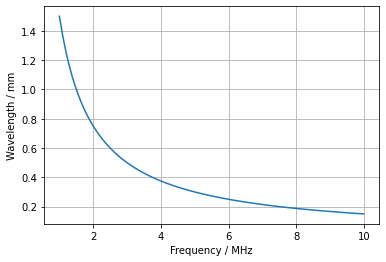

In [4]:
freq = np.linspace(1,10,100) 

plt.plot(freq, 1.5/freq)
plt.xlabel('Frequency / MHz')
plt.ylabel('Wavelength / mm')
plt.grid()

In [6]:
50/256

0.1953125

In [231]:
@np.vectorize
def find_delay(x_n, z_r, x_r ):
    c = 1540
    r = np.sqrt(x_r*x_r + z_r * z_r)
    
    tn =  (r - np.sqrt(z_r **2 + (x_r - x_n)**2))
    return tn 



plt.figure(figsize=(10,4))
c = 1540
f = 1e6



zs = np.linspace(50,60,500)
xs = np.linspace(-5, 5,500)

zs = np.linspace(0,150,500)
xs = np.linspace(-50, 50,500)
Z, X = np.meshgrid(zs, xs)

print(1/f)
array = np.ceil(np.abs(find_delay(30, Z, X)- find_delay(-30, Z, X)))
array = find_diff(30, Z, X)
%config InlineBackend.figure_formats = ['png']
plt.pcolormesh(Z,X, array, cmap='RdBu')
plt.xlabel('Axial coordinate $ z_r / \lambda_0$')
plt.ylabel('Lateral coordinate $x_r/ \lambda_0$')
plt.colorbar()

1e-06


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 720x288 with 0 Axes>

In [238]:
def find_diff(x_n, z_r, x_r):
    xs = np.arange(-x_n, x_n + 1)
    #xs = np.concatenate((np.arange(-x_n, 1), [x_n]))
    array = np.zeros((len(xs), len(z_r), len(x_r)))
    for i, x_n in enumerate(xs):
        tn = find_delay(x_n, z_r, x_r)
        array[i,:,:] = tn
    
    diff = np.max(array, axis=0) - np.min(array, axis=0)
    return diff

In [239]:
zs = np.linspace(0,150,500)
xs = np.linspace(-50, 50,500)
Z, X = np.meshgrid(zs, xs)

test = find_diff(30, Z, X)


/var/folders/55/y8nplzr92z3002w35fdrm2wc0000gn/T/ipykernel_76472/1493351641.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Z,X, np.ceil(test), cmap='RdBu_r')


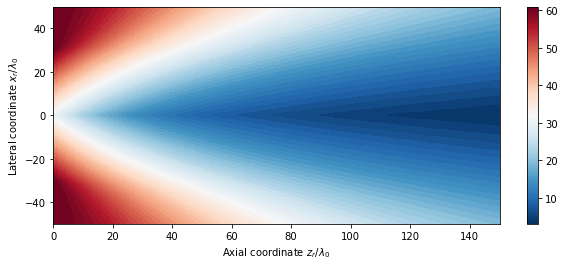

In [247]:
plt.figure(figsize=(10,4))
plt.pcolormesh(Z,X, np.ceil(test), cmap='RdBu_r')
plt.xlabel('Axial coordinate $ z_r / \lambda_0$')
plt.ylabel('Lateral coordinate $x_r/ \lambda_0$')
plt.colorbar()

In [186]:
np.concatenate((np.arange(1,10), [11]))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

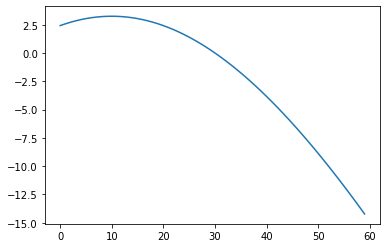

In [158]:
x_n = np.arange(-30,30)
plt.plot(find_delay(x_n, 60, 20))

In [234]:
def find_delay_ang(theta, r, x_n):
    c = 1540
    t_delay = r - np.sqrt(r*r - 2*r*x_n*np.sin(theta/180*np.pi) + x_n*x_n)
    return t_delay

theta = np.linspace(0, 90, 100)

def find_diff_ang(theta, r, x_n):
    xs = np.concatenate((np.arange(-x_n, 1), [x_n]))
    array = np.zeros((len(xs), len(theta)))
    for i, x_n in enumerate(xs):
        tn = find_delay_ang(theta, r, x_n)
        array[i,:] = tn
    
    diff = np.max(array, axis=0) - np.min(array, axis=0)
    return diff  

find_diff_ang(theta, 60, 30)
find_delay_ang(45, 60, 30)


15.791227253762976

In [235]:
60*np.cos(np.pi/4)

42.42640687119285

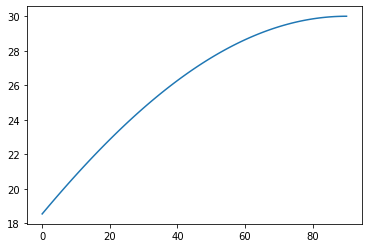

In [237]:
plt.plot(theta, find_diff_ang(theta, 15, 30))